In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt


%load_ext autoreload
%autoreload 2

%matplotlib inline

In [16]:
# initialize network
N = 10 # number of neurons
m= 3 # number of input neurons

W = np.random.rand(N,N)-.5
W+=W.T/2
W[np.diag_indices(N)]=0
W*=0


J = 5.*(np.random.rand(N,m)-.5)
v0, v1 = np.array([-1,-1,-1])[:,np.newaxis], np.array([1,1,1])[:,np.newaxis]

sigmoid = lambda x: 1 / (1 + np.exp(-10*(x-.5))) 

Text(0.5, 1.0, 'activation function')

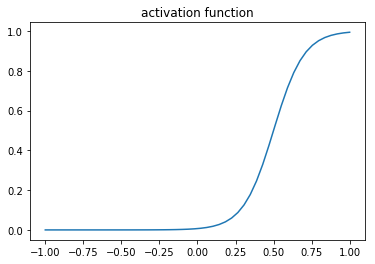

In [17]:
f,ax = plt.subplots()
x = np.linspace(-1,1)
ax.plot(x,sigmoid(x))
ax.set_title('activation function')

In [73]:
S0 = sigmoid(np.matmul(J,v0))
S1 = sigmoid(np.matmul(J,v1))

In [74]:
print(S0,S1)

[[-0.99754685]
 [-0.9955775 ]
 [ 0.99999997]
 [ 0.97733886]
 [-0.98712576]
 [-0.71690581]
 [ 0.99999839]
 [-0.99999999]
 [ 1.        ]
 [-1.        ]] [[ 0.99754685]
 [ 0.9955775 ]
 [-0.99999997]
 [-0.97733886]
 [ 0.98712576]
 [ 0.71690581]
 [-0.99999839]
 [ 0.99999999]
 [-1.        ]
 [ 1.        ]]


In [75]:
# basic hopfield

alpha = .1 # learning rate
tau = .001 # decay rate

T = 100 # number of training loops

for t in range(T):
    for S in [S0,S1]:
        
        delta_W = alpha*np.matmul(S,S.T)
        delta_W[np.diag_indices(N)]=0
        
        W+=delta_W
        

In [76]:
print(W)

[[  0.          19.86270394 -19.95093642 -19.49882608  19.6940838
   14.30294269 -19.95090488  19.95093669 -19.95093695  19.9509369 ]
 [ 19.86270394   0.         -19.91154939 -19.4603316   19.65520385
   14.2747059  -19.91151792  19.91154967 -19.91154992  19.91154987]
 [-19.95093642 -19.91154939   0.          19.5467767  -19.7425146
  -14.33811583  19.99996724 -19.99999913  19.99999938 -19.99999933]
 [-19.49882608 -19.4603316   19.5467767    0.         -19.29512733
  -14.01319823  19.54674581 -19.54677697  19.54677722 -19.54677717]
 [ 19.6940838   19.65520385 -19.7425146  -19.29512733   0.
   14.15352387 -19.74248339  19.74251487 -19.74251512  19.74251507]
 [ 14.30294269  14.2747059  -14.33811583 -14.01319823  14.15352387
    0.         -14.33809317  14.33811603 -14.33811621  14.33811618]
 [-19.95090488 -19.91151792  19.99996724  19.54674581 -19.74248339
  -14.33809317   0.         -19.99996752  19.99996777 -19.99996772]
 [ 19.95093669  19.91154967 -19.99999913 -19.54677697  19.7425148

In [77]:

St = np.copy(S0)
St[:2]*=-1
print(np.concatenate((S0,St),axis=-1))
print(((S0-St).ravel()**2).mean())
for t in range(10):
    St = sigmoid(np.matmul(W,St))
    print(((S0-St).ravel()**2).mean())
print(np.concatenate((S0[:,np.newaxis],St[:,np.newaxis]),axis=-1))

[[-0.99754685  0.99754685]
 [-0.9955775   0.9955775 ]
 [ 0.99999997  0.99999997]
 [ 0.97733886  0.97733886]
 [-0.98712576 -0.98712576]
 [-0.71690581 -0.71690581]
 [ 0.99999839  0.99999839]
 [-0.99999999 -0.99999999]
 [ 1.          1.        ]
 [-1.         -1.        ]]
0.7945097087621088
0.008084716880807544
0.008084716880807544
0.008084716880807544
0.008084716880807544
0.008084716880807544
0.008084716880807544
0.008084716880807544
0.008084716880807544
0.008084716880807544
0.008084716880807544
[[[-0.99754685 -1.        ]]

 [[-0.9955775  -1.        ]]

 [[ 0.99999997  1.        ]]

 [[ 0.97733886  1.        ]]

 [[-0.98712576 -1.        ]]

 [[-0.71690581 -1.        ]]

 [[ 0.99999839  1.        ]]

 [[-0.99999999 -1.        ]]

 [[ 1.          1.        ]]

 [[-1.         -1.        ]]]


In [78]:
# stochastic gradient descent hopfield

# initialize W
N = 10 # number of neurons
m= 3 # number of input neurons

W = np.random.rand(N,N)-.5
W+=W.T/2
W[np.diag_indices(N)]=0


T=1000
eta = 1
# do until convergence
for t in range(T):


#     sample a target pattern,S/yp, at frequency that is relevant to task
    for yp in [S0,S1]:
        
        yd = np.copy(yp)
        for dv in range(4):
            yd = sigmoid(np.matmul(W,yd))
            
        W += eta*(yp*yp.T - yd*yd.T)
        W[np.diag_indices_from(W)]=0


#     let network evolve from yp for a few steps (2-4)to yd

#     update weights W+= eta*(yp*yp.T - yd*yd.T)

In [79]:
print(W)

[[ 0.          0.55453487  0.39577698 -0.45214452  0.79151108  0.2609092
  -0.07172182 -0.41702033 -1.1022416  -1.06695523]
 [ 0.8258564   0.         -1.52274908  1.90670423 -1.79986094  0.27623493
  -0.39953354  1.27457674  1.04275809  1.40785052]
 [ 0.18215457 -1.63521455  0.          1.24198752 -1.46818114  0.35198448
   0.50428621  0.11028418  2.24061006  0.03677153]
 [-0.71822976  1.66824644  1.25908942  0.          1.98467815 -0.34306621
   0.03129475 -0.78103041 -0.48425621 -1.66073586]
 [ 0.58178453 -1.80619766 -1.15906195  1.75777811  0.          0.36148894
  -0.14484022  1.22520432  0.57515976  1.41918753]
 [ 0.24308229  0.14248773  0.40926148 -0.20473685  0.32316148  0.
  -1.06659279  0.67696172 -1.91230175 -0.14034674]
 [-0.12490493 -0.27145623  0.51759479 -0.1551861  -0.26375862 -0.9636931
   0.         -0.71279528  1.45018257 -1.29649174]
 [-0.52637265  1.39874795  0.02856737 -1.19757955  1.28879287  0.71254772
  -1.16669462  0.         -2.10149542 -0.23279958]
 [-0.78401

In [80]:
St = np.copy(S0)
St[:2]*=-1
print(np.concatenate((S0[:,np.newaxis],St[:,np.newaxis]),axis=-1))
print(((S0-St).ravel()**2).mean())
for t in range(10):
    St = sigmoid(np.matmul(W,St))
    print(((S0-St).ravel()**2).mean())
print(np.concatenate((S0[:,np.newaxis],St[:,np.newaxis]),axis=-1))

[[[-0.99754685  0.99754685]]

 [[-0.9955775   0.9955775 ]]

 [[ 0.99999997  0.99999997]]

 [[ 0.97733886  0.97733886]]

 [[-0.98712576 -0.98712576]]

 [[-0.71690581 -0.71690581]]

 [[ 0.99999839  0.99999839]]

 [[-0.99999999 -0.99999999]]

 [[ 1.          1.        ]]

 [[-1.         -1.        ]]]
0.7945097087621088
0.4238942981760253
0.028132282532478466
0.008761571438793853
0.008020798042264559
0.00820156757551305
0.008095816838452747
0.008141884512676122
0.008120202376998304
0.00813017598800269
0.008125641488735642
[[[-0.99754685 -0.99704441]]

 [[-0.9955775  -0.99209068]]

 [[ 0.99999997  1.        ]]

 [[ 0.97733886  0.94726158]]

 [[-0.98712576 -0.9730885 ]]

 [[-0.71690581 -1.        ]]

 [[ 0.99999839  1.        ]]

 [[-0.99999999 -1.        ]]

 [[ 1.          1.        ]]

 [[-1.         -1.        ]]]


In [83]:
morphs = [0,.25,.5,.75,1]
for m in morphs:
    St = sigmoid(np.matmul(J,(1-m)*v0 + m*v1))
    for t in range(10):
        St = sigmoid(np.matmul(W,St))
    print(((S0-St).ravel()**2).mean(),((S1-St).ravel()**2).mean())

0.008084499592529559 3.877862986508101
0.008084499592529559 3.877862986508101
0.9429833411849531 0.9429833411849533
3.877862986508101 0.008084499592529559
3.877862986508101 0.008084499592529559


In [131]:
# repeat SGD hopfield with more relevant training to rare morph
# stochastic gradient descent hopfield

# initialize W
N = 100 # number of neurons
k= 3 # number of input neurons

W = np.random.rand(N,N)-.5
W+=W.T/2
W[np.diag_indices(N)]=0

J = 5.*(np.random.rand(N,k)-.5)
v0, v1 = np.array([-1,-1,-1])[:,np.newaxis], np.array([1,1,1])[:,np.newaxis]
S0 = sigmoid(np.matmul(J,v0))
S1 = sigmoid(np.matmul(J,v1))

T=10000
eta = 1
# do until convergence
for t in range(T):


#     sample a target pattern,S/yp, at frequency that is relevant to task
    # rare morph 
    if np.random.rand()<=.5:
        m = 0
    else:
        m=1
    yp = sigmoid(np.matmul(J,(1-m)*v0 + m*v1 + np.random.rand(3,1)-.5))
    
    yd = np.copy(yp)
    for dv in range(4):
        yd = sigmoid(np.matmul(W,yd))
            
    W += eta*(yp*yp.T - yd*yd.T)
    W[np.diag_indices_from(W)]=0


#     let network evolve from yp for a few steps (2-4)to yd

#     update weights W+= eta*(yp*yp.T - yd*yd.T)

In [132]:
morphs = [0,.25,.5,.75,1]
for m in morphs:
    St = sigmoid(np.matmul(J,(1-m)*v0 + m*v1))
    for t in range(10):
        St = sigmoid(np.matmul(W,St))
    print(((S0-St).ravel()**2).mean(),((S1-St).ravel()**2).mean())

0.0913466823840948 3.709549560742272
0.0913466823840948 3.709549560742272
0.9004486507144598 0.9004486507144597
3.709549560742272 0.0913466823840948
3.709549560742272 0.0913466823840948


In [140]:
# repeat SGD hopfield with more relevant training to rare morph
# stochastic gradient descent hopfield

# initialize W
N = 1000 # number of neurons
k= 3 # number of input neurons

W = np.random.rand(N,N)-.5
W+=W.T/2
W[np.diag_indices(N)]=0


J = 5.*(np.random.rand(N,k)-.5)
v0, v1 = np.array([-1,-1,-1])[:,np.newaxis], np.array([1,1,1])[:,np.newaxis]
S0 = sigmoid(np.matmul(J,v0))
S1 = sigmoid(np.matmul(J,v1))

T=1000
eta = .1
# do until convergence
for t in range(T):


#     sample a target pattern,S/yp, at frequency that is relevant to task
    # rare morph 
    m = morphs[np.random.randint(5)]
    m = np.random.randint(2)
    yp = sigmoid(np.matmul(J,(1-m)*v0 + m*v1 + .0*np.random.rand(3,1)-.5))
    
    yd = np.copy(yp)
    for dv in range(4):
        yd = sigmoid(np.matmul(W,yd))
            
    W += eta*(yp*yp.T - yd*yd.T)
    W[np.diag_indices_from(W)]=0


#     let network evolve from yp for a few steps (2-4)to yd

#     update weights W+= eta*(yp*yp.T - yd*yd.T)

In [141]:
morphs = [0,.25,.5,.75,1]
for m in morphs:
    St = sigmoid(np.matmul(J,(1-m)*v0 + m*v1))
    for t in range(10):
        St = sigmoid(np.matmul(W,St))
    print(((S0-St).ravel()**2).mean(),((S1-St).ravel()**2).mean())

0.1124956762229607 3.631778993969364
0.1124956762229607 3.631778993969364
0.8721538076876497 0.8721538076876497
3.631778993969364 0.1124956762229607
3.631778993969364 0.1124956762229607


In [ ]:
# probe resulting network with intermediate representations